In [7]:
from executer_indi import *
import os
import urllib.parse
import librosa

def load_audio_files(file_path):
    """Loads audio files from the specified directory."""
    audio_data, samplerate = librosa.load(file_path, sr=None)  # Load audio file with original sampling rate
    return audio_data, samplerate


if __name__ == "__main__":
    encoded_str = "../soundClassifier/dataset/d95e05c6-%EA%B8%88%EC%9A%94%EC%9D%BC_%EC%98%A4%ED%9B%84_1-26.m4a"
    decoded_str = urllib.parse.unquote(encoded_str)
    audio_files, sr = load_audio_files(decoded_str) # Load audio files from the dataset directory
    chunk_size = 2 * sr  # Define chunk size as 3 seconds
    hop_size=int(len(audio_files)/100)
    audio_chunks = [audio_files[i:i + chunk_size] for i in range(0, len(audio_files) - chunk_size + 1, hop_size)]  # Split audio_files into chunks with hops
        # Assuming there's a method in the AudioAnalyzer class to handle audio data
    print(len(audio_chunks))
    analyzer = AudioAnalyzer()
    data = []
    for idx, chunck in enumerate(audio_chunks):
        analyzer.audio_waveform = chunck  # Set the audio waveform
        analyzer.samplerate = sr  # Set the samplerate
        ret = analyzer.process_audio()  # Call the process_audio method to handle the audio data
        data.append(ret)
        # output_dir = 'new_dataset'
        # if not os.path.exists(output_dir):
        #     os.makedirs(output_dir)
        # output_file_path = os.path.join(output_dir, f'output_{idx}_{ret["prediction_text"]}.wav')
        # sf.write(output_file_path, ret['audio_waveform'], sr)  # Save the audio waveform to a new file


C:\Users\Hoon\AppData\Local\Temp\ipykernel_45088\2132925265.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, samplerate = librosa.load(file_path, sr=None)  # Load audio file with original sampling rate
c:\Users\Hoon\Nextcloud3\Projects\soundClassifier\.venv\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


97


In [8]:
arr = np.vstack([d['raw_pred'] for d in data])
print(arr.shape)

(97, 15)


c:\Users\Hoon\Nextcloud3\Projects\soundClassifier\.venv\lib\site-packages\matplotlib\axes\_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


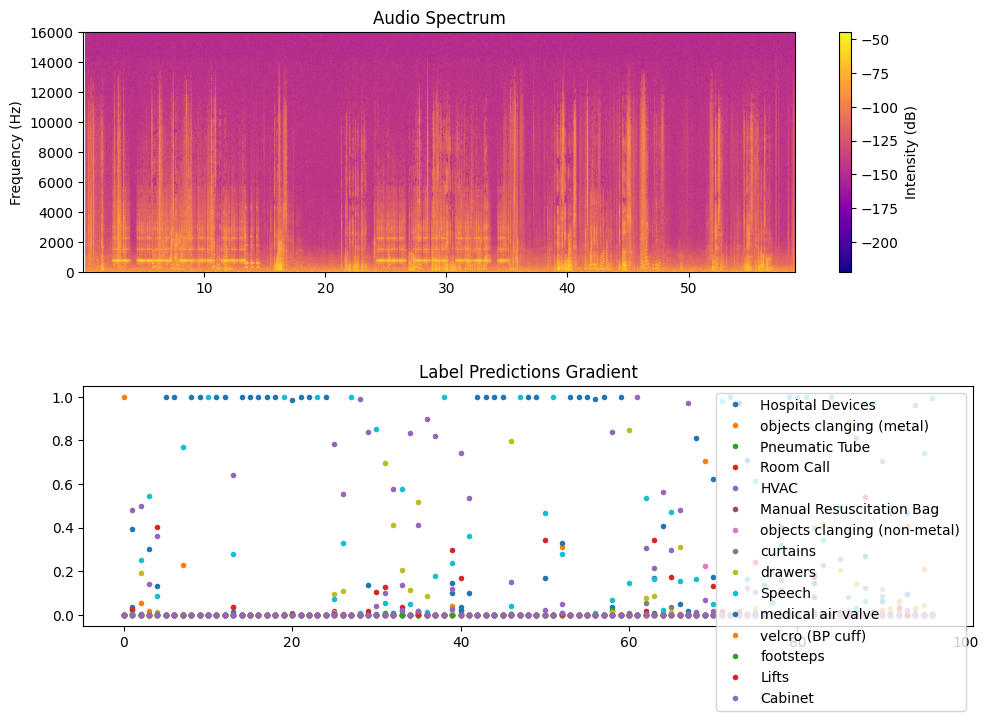

In [9]:

import matplotlib.pyplot as plt

# Plot audio spectrum
plt.figure(figsize=(10, 10))

# Plot the audio spectrum on the top
plt.subplot(3, 1, 1)
plt.title("Audio Spectrum")
plt.specgram(audio_files, NFFT=1024, Fs=sr, Fc=0, noverlap=512, cmap='plasma', sides='default', mode='default')
plt.colorbar(label='Intensity (dB)')
plt.ylabel('Frequency (Hz)')

# Plot the gradient of each output label to ret['prediction_raw'] on the bottom
plt.subplot(3, 1, 2)
plt.title("Label Predictions Gradient")
plt.plot(arr, '.', label=analyzer.labels)    
plt.legend()
plt.tight_layout()
plt.show()



In [10]:
arr = arr.T

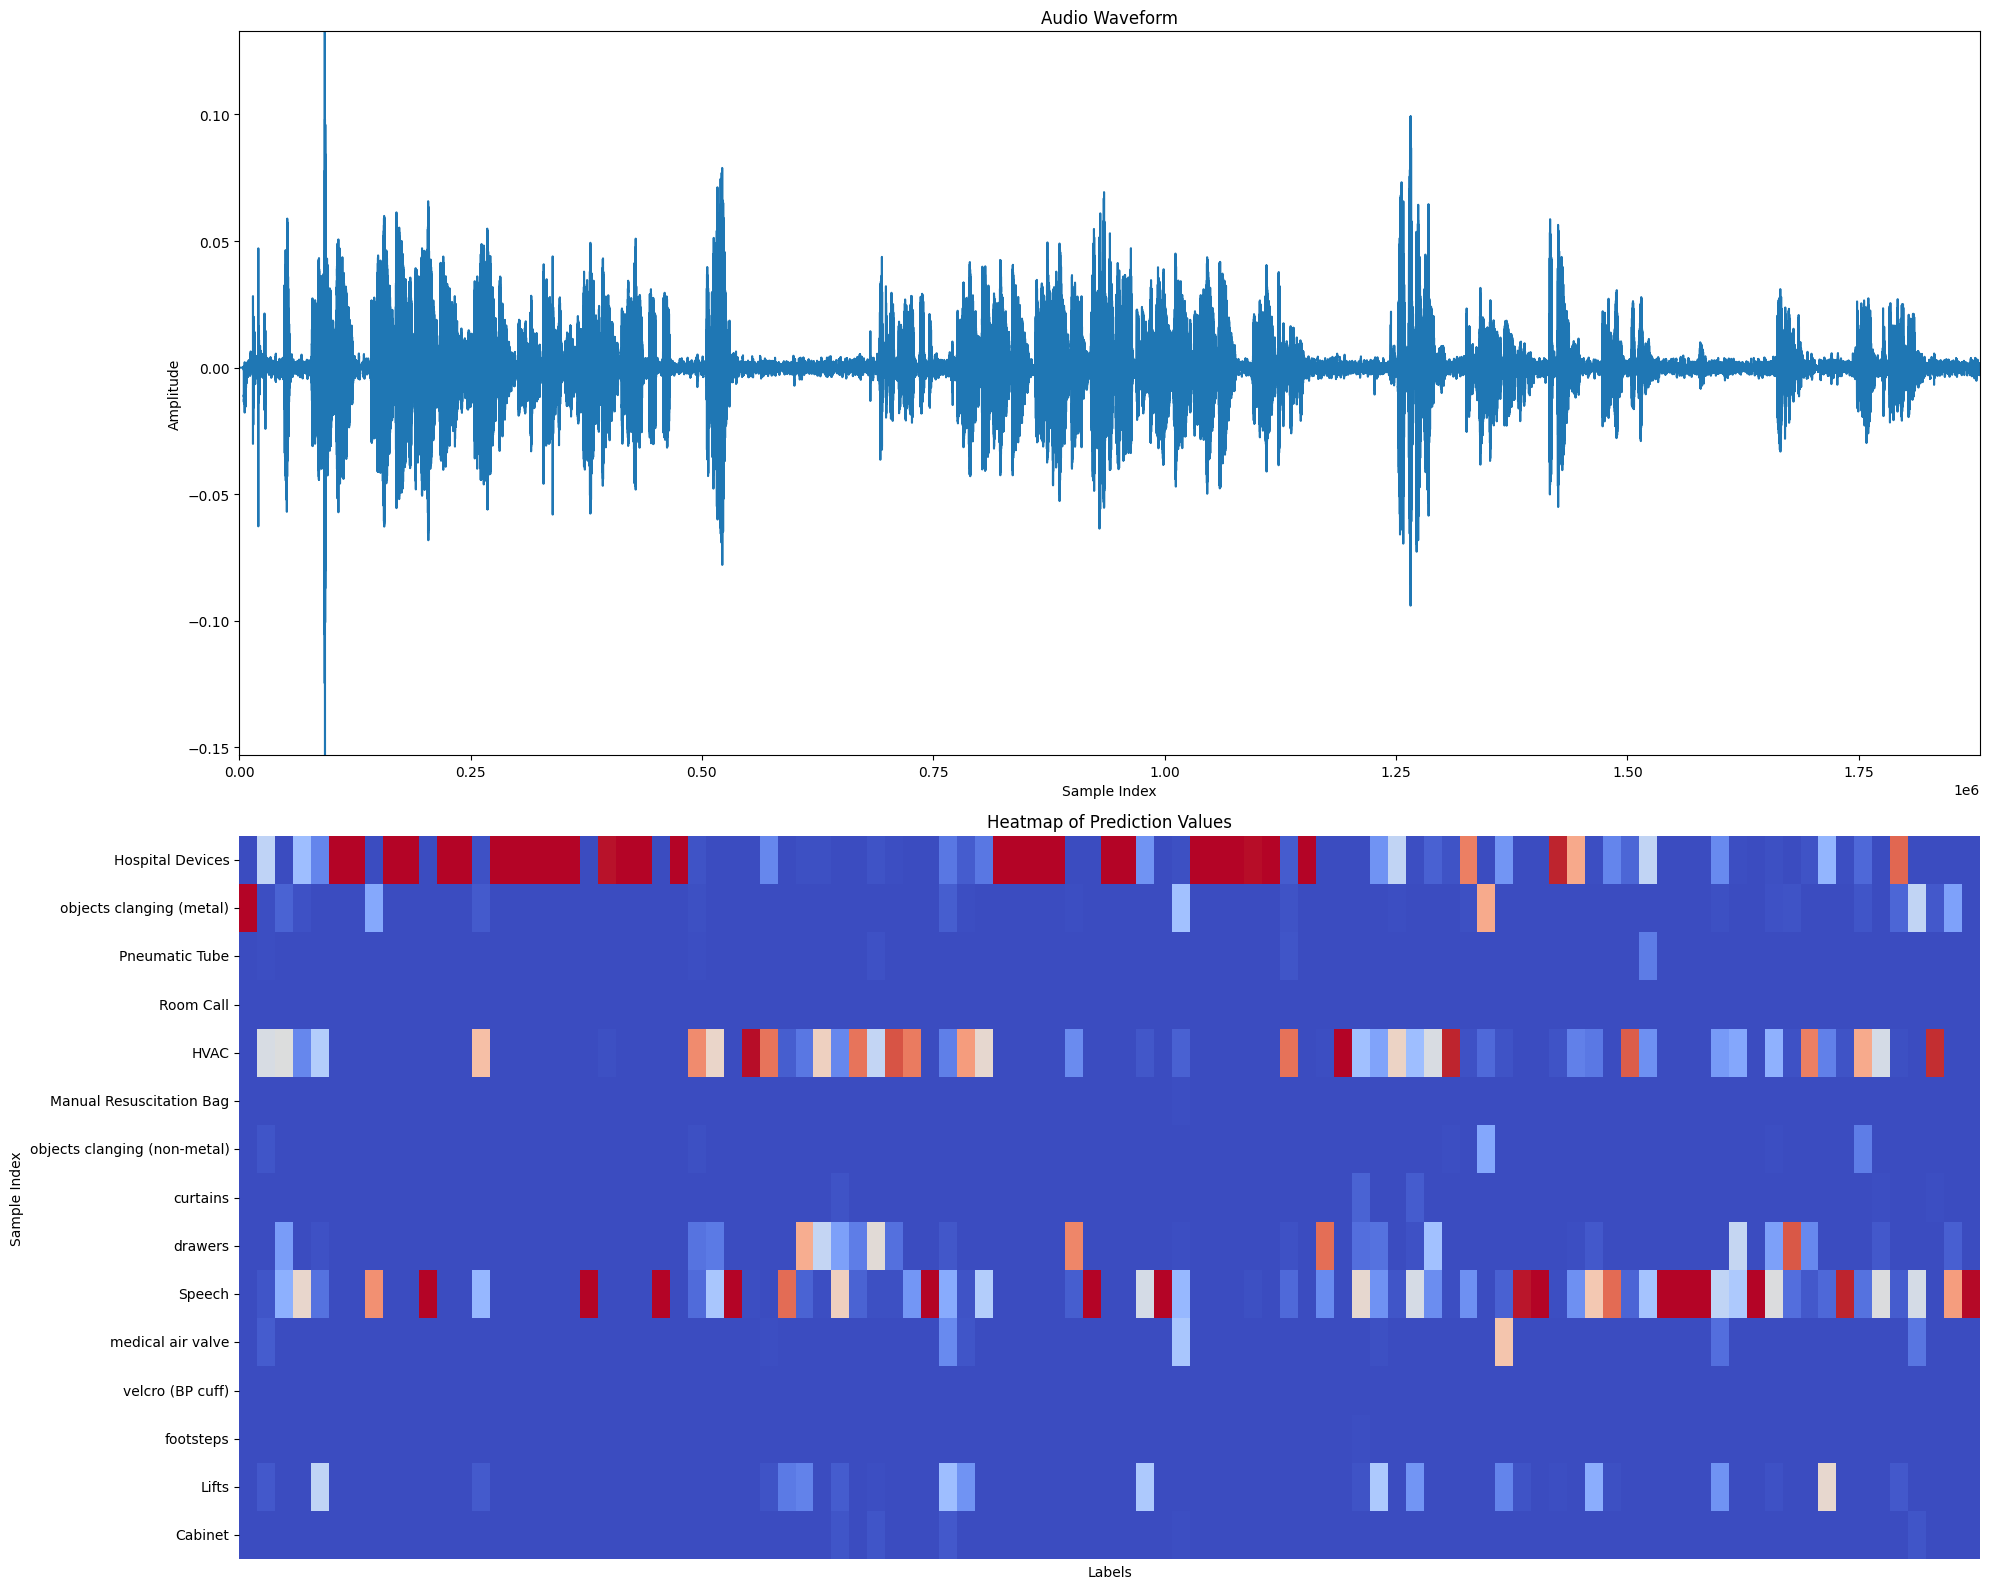

In [11]:
import seaborn as sns
import numpy as np

# Assuming 'arr' contains the prediction values for each label
# Create a heatmap of the prediction values
# ... existing code ...
# Create a new figure for the demo
plt.figure(figsize=(20, 16))  # Adjusted figure size for more space

# Plot the audio waveform
# Plot the audio waveform
plt.subplot(2, 1, 1)  # Create a subplot for the audio waveform
plt.title("Audio Waveform")
plt.plot(audio_files)  # Plot the audio data
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.xlim(0, len(audio_files))  # Set x-axis limits to match the length of audio_files
plt.margins(0)  # Remove margins

# Create a heatmap of the prediction values
plt.subplot(2, 1, 2)  # Create a subplot for the heatmap
sns.heatmap(arr, annot=False, fmt=".2f", cmap='coolwarm', yticklabels=analyzer.labels, xticklabels=[], cbar=False)  # xticklabels=np.linspace(0, len(audio_files), 95)[]
plt.title("Heatmap of Prediction Values")
plt.xlabel("Labels")
plt.ylabel("Sample Index")

# Align x-axes
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
# ... existing code ...


In [22]:
import random 
random_samples = random.sample(data, min(1, len(data)))[0]  # Select random 5 samples from data
audio_waveform = random_samples['audio_waveform']
samplerate = random_samples['samplerate']
print(random_samples['raw_pred'])  # Print the raw prediction values
import IPython.display as ipd  # Import for audio playback
ipd.Audio(audio_waveform, rate=samplerate)  # Create an audio player for the waveform

[8.8610715e-05 3.0629704e-02 8.1415664e-08 1.1854008e-06 9.5994776e-01
 1.8028239e-06 1.5157866e-04 6.7966431e-03 8.8146560e-05 1.6264302e-03
 2.1102138e-05 8.4844277e-07 2.6414460e-08 6.4139796e-04 4.8509564e-06]
